In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision = 2) # print 옵션 설정 소수점 아래를 고정 값을 정하여 출력 

fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names]
y_fruits = fruits["fruit_label"]
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0) # 디폴트로 Train 75 % test 25% 


# 각 Feature마다 값의 범위가 다르다. 각 Feature의 값을 일정한 범위 또는 규칙에 따르게 하기 위해서 스케일링을 사용
# 최소값(Min)과 최대값(Max)을 사용해서 '0~1' 사이의 범위(range)로 데이터를 표준화해주는 '0~1 변환

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train) # 훈련데이와 훈련라벨에 fit 사용 , knn객체의 내부상태를 업데이트하는 훈련과정 
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn.predict(example_fruit_scaled)[0]-1])

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  mandarin


모델은 연구되거나, 예측되는 하나 이상의 입력변수와 출벽변수 사이의 관계를 표현하는 특정 수학적 또는 계산적 설명     
통계 입력변수를 독립변수 , 출력변수를 종속변수 y= f(x)    
머신러닝에서는 입력 또는 독립변수를 지칭하기 위해 feture 용어 사용 , 출력, 종속변수는 대상 값 또는 대상레이블로 표현 

#### Overfitting and Underfitting

Generalization ability refers to an algorithm's ability to give accurate predictions for new , previously unseen data.

* Asuumtions :
 - Future unseen data(test data) will have the same properties as the current traning sets.
 - Thus, models that are accurate on the traning set are expected to be accrate on the test set.
 - But that may not happen if the trained model is tuned too specifically to the training set.
 
 
* Models that are too complex for the amount of training data available are said to **overfit** and are not likely to generalization well to new example.
* Models that are too simple. that don't even do well the training data, are said to **underfit** and also not likely to generalize well.

#### Datasets

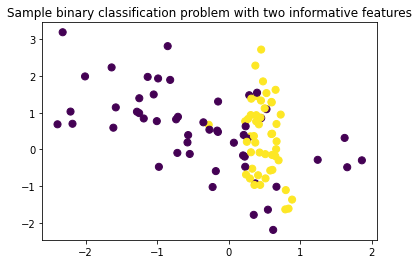

In [3]:
# Scikit-Learn 패키지는 분류(classification) 모형의 테스트를 위해 여러가지 가상 데이터를 생성하는 함수를 제공
# make_blobs 함수는 등방성 가우시안 정규분포를 이용해 가상 데이터를 생성한다. 등방성이라는 말은 모든 방향으로 같은 성질을 가진다는 뜻
from sklearn.datasets import make_classification

#  synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
# 표본수 , 독립변수의 수, 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수
# 클래스 당 클러스터의 수, 예측라벨을 임의로 바꿔서 100%의 정확도에 다다르지 못하게 방지, 클래스간 얼마나 떨어져있는가
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50)
plt.show()

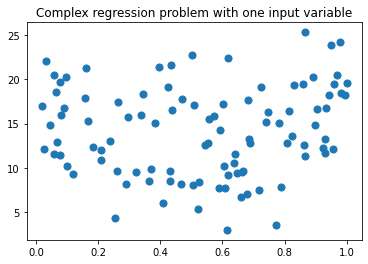

In [4]:
# synthetic dataset for more complex regression
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

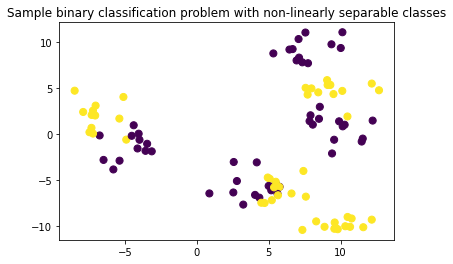

In [7]:
# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
from sklearn.datasets import make_blobs
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50)
plt.show()

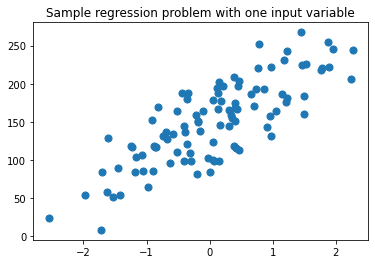

In [8]:
from sklearn.datasets import make_regression

plt.figure()
plt.title('Sample regression problem with one input variable')

# 표본의 수 , 독립변수의 수 , 독립변수중 실제로 종속변수와 상관관계가 있는 독립변수의 수, 절편, 종속변수에 더해지는 정규분포의 표준편차
X_R1 , y_R1 = make_regression(n_samples =100 , n_features = 1 , n_informative = 1, bias = 150.0, noise = 30, random_state = 0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

### K-Nearest Neighbors: Classification and Regression

Given a training set X_train with labels y_train, and given a new instance x_test to be classified:
1. Find the most similar instances (let's call them X_NN) to x_test that are in X_train.
2. Get the labels y_NN for the instances in X_NN
3. Predict the label for x_test by combining the labels y_NN e.g. simple majority vote

In [10]:
#  Regression
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))


[231.71 148.36 150.59 150.59  72.15 166.51 141.91 235.57 208.26 102.1
 191.32 134.5  228.32 148.36 159.17 113.47 144.04 199.23 143.19 166.51
 231.71 208.26 128.02 123.14 141.91]
R-squared test score: 0.425


The R2 ("r-squared") Regression Score
* Measures how well a prediction model for 

regression fits the given data.
* The score is between 0 and 1:
- A value of 0 corresponds to a constant model that predicts the mean value of all training target values.
- A value of 1 corresponds to perfect prediction
- Also known as "coefficient of determination"


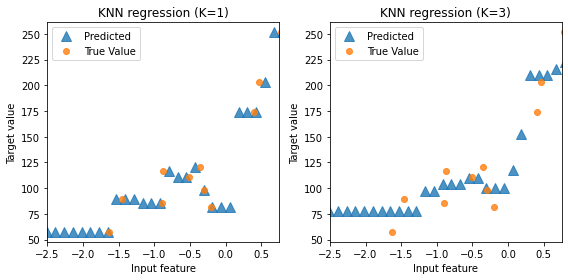

In [11]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

### Regression model complexity as a function of K

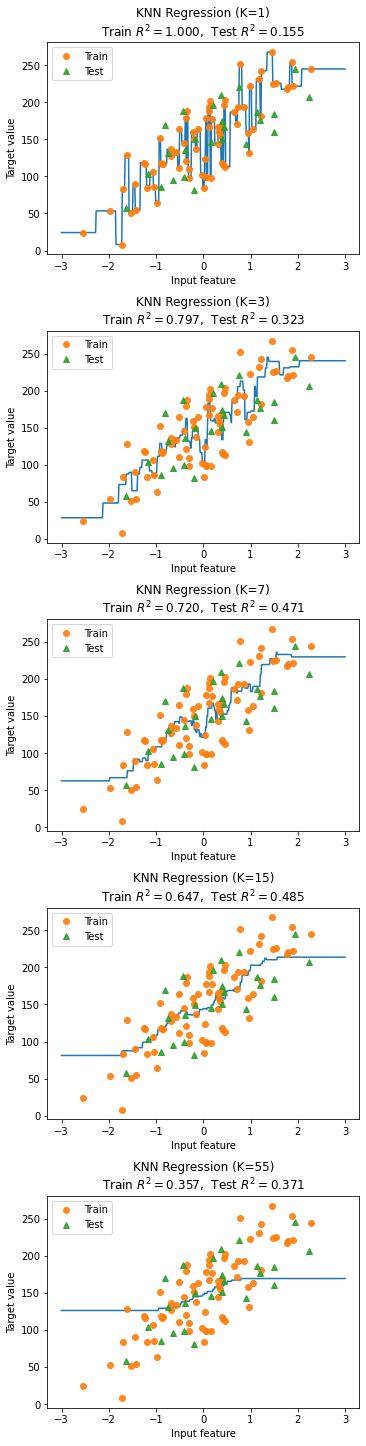

In [13]:
fig, subaxes = plt.subplots(5,1, figsize = (5,20))

X_predict_input = np.linspace(-3,3,500).reshape(-1,1)  # 균등한 간격 
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

KNeighborsClassifier and KNeighborsRegressor: important parameters  

Model complexity  
- n_neighbors : number of nearest neighbors (k) to consider,  Default = 5  

Model fitting  
- metric: distance function between data points
- Default: Minkowski distance with power parameter p = 2  (Euclidean)

### Linear Regression: Least-Squares

In [14]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [45.71]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492
